### Import needed libraries
Import libraries as we need.

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

### Import dataset
1) Read csv file and get head of that
2) Get more information of data

##### Read csv file and get head of that

In [6]:
df = pd.read_csv('train.csv')
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


##### Get more information of data

In [7]:
df.shape

(2000, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [37]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Plot some features
1) Battery Power vs Price Range
2) RAM vs Price Range
3) Bluetooth vs Price Range
4) 4G vs Price Range
5) Memory vs Price Range
6) Weight vs Price Range

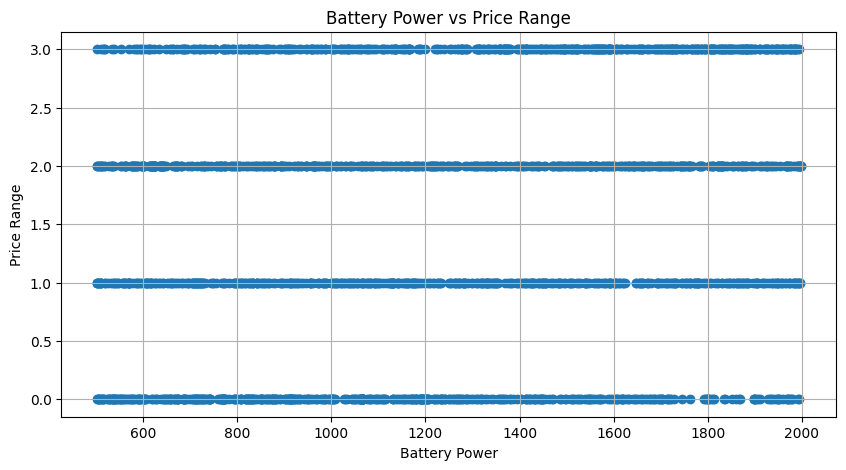

In [41]:
plt.figure(figsize=(10, 5))
plt.scatter(df["battery_power"], df["price_range"])
plt.xlabel("Battery Power")
plt.ylabel("Price Range")
plt.title("Battery Power vs Price Range")
plt.grid()
plt.show()

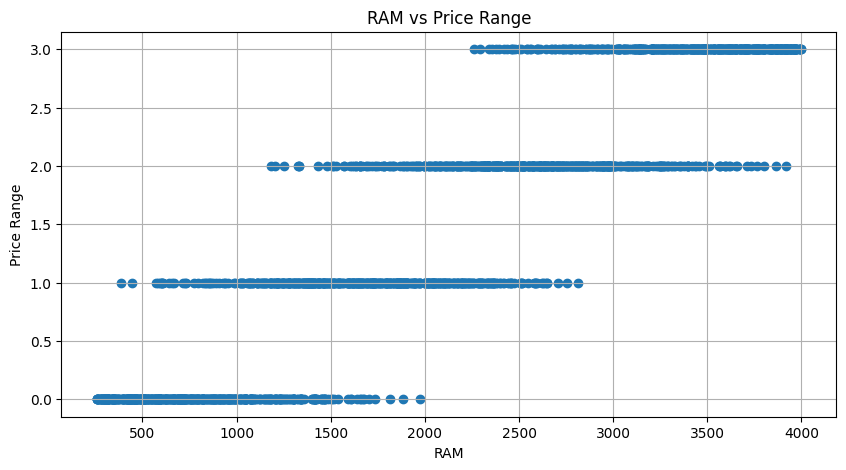

In [48]:
plt.figure(figsize=(10, 5))
plt.scatter(df["ram"], df["price_range"])
plt.xlabel("RAM")
plt.ylabel("Price Range")
plt.title("RAM vs Price Range")
plt.grid()
plt.show()

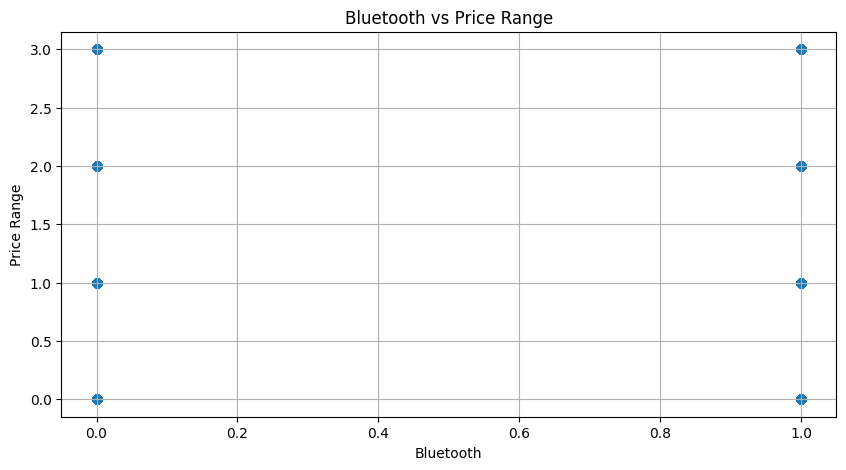

In [49]:
plt.figure(figsize=(10, 5))
plt.scatter(df["blue"], df["price_range"])
plt.xlabel("Bluetooth")
plt.ylabel("Price Range")
plt.title("Bluetooth vs Price Range")
plt.grid()
plt.show()

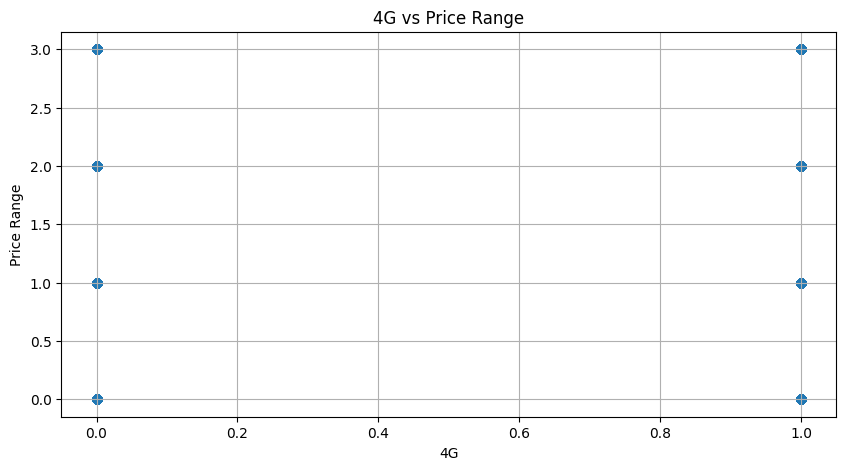

In [50]:
plt.figure(figsize=(10, 5))
plt.scatter(df["four_g"], df["price_range"])
plt.xlabel("4G")
plt.ylabel("Price Range")
plt.title("4G vs Price Range")
plt.grid()
plt.show()

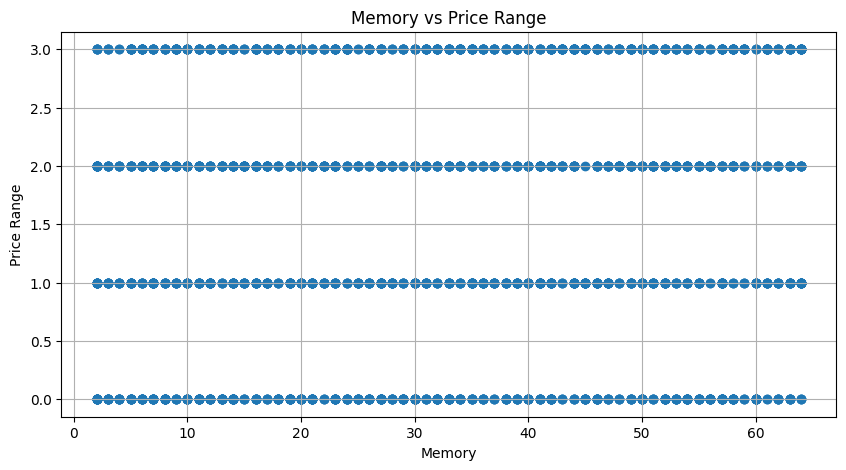

In [51]:
plt.figure(figsize=(10, 5))
plt.scatter(df["int_memory"], df["price_range"])
plt.xlabel("Memory")
plt.ylabel("Price Range")
plt.title("Memory vs Price Range")
plt.grid()
plt.show()

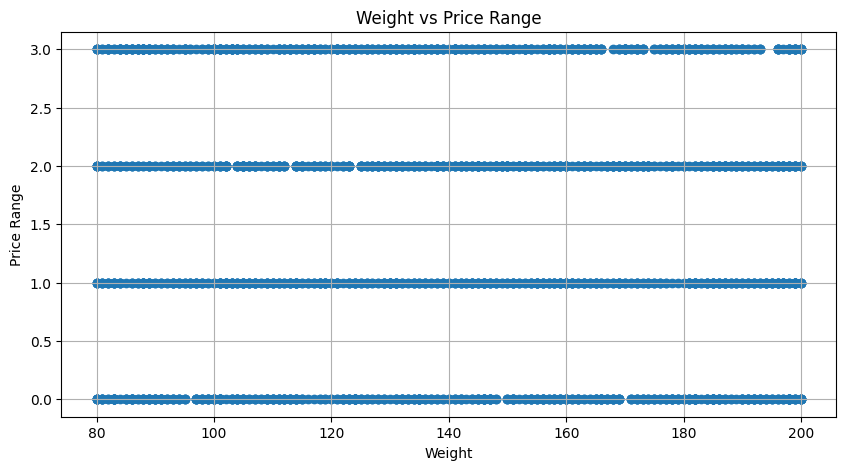

In [52]:
plt.figure(figsize=(10, 5))
plt.scatter(df["mobile_wt"], df["price_range"])
plt.xlabel("Weight")
plt.ylabel("Price Range")
plt.title("Weight vs Price Range")
plt.grid()
plt.show()

### Preprocessing
1) Check do we have null values in the dataset.
2) Let's check some values of dataset, how much we can trust to this dataset.

#### Check do we have null values in the dataset.

In [66]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### Let's check some values of dataset, how much we can trust to this dataset.

In [53]:
df[df["px_height"] == 0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1481,1834,0,2.1,0,7,1,40,0.1,99,4,...,0,1987,3692,13,0,16,1,1,0,3
1933,897,1,2.0,0,3,1,2,0.6,154,8,...,0,994,1958,7,5,7,1,1,0,1


There is no such a mobile with `px_height` 0 !!!

In [54]:
df[df["px_width"] == 0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


We don't have problem with `px_width`.

In [55]:
df[df["mobile_wt"] == 0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


We don't have problem with `mobile_wt` but we need to check more.

In [65]:
df["mobile_wt"]

0       188
1       136
2       145
3       131
4       141
       ... 
1995    106
1996    187
1997    108
1998    145
1999    168
Name: mobile_wt, Length: 2000, dtype: int64

I got all of the values of `mobile weight` and sort them in ascending order to see, do we have any not make sense values or not.

In [68]:
df["sc_w"].sort_values()

854      0
159      0
1781     0
1245     0
1253     0
        ..
1060    18
1972    18
1254    18
1807    18
1645    18
Name: sc_w, Length: 2000, dtype: int64

Why we have `screen width` equal `0`?!!

In [71]:
df[df["sc_w"] == 0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
12,1815,0,2.8,0,2,0,33,0.6,159,4,...,607,748,1482,18,0,2,1,0,0,1
24,503,0,1.2,1,5,1,8,0.4,111,3,...,201,1245,2583,11,0,12,1,0,0,1
33,1310,1,2.2,1,0,1,51,0.6,100,4,...,178,1919,3845,7,0,12,1,1,0,3
42,1253,1,0.5,1,5,1,5,0.2,152,2,...,685,714,1878,15,0,4,1,1,0,1
50,1547,1,3.0,1,2,1,14,0.7,198,3,...,1042,1832,2059,5,0,15,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,772,0,1.0,1,0,1,23,0.6,97,7,...,317,1805,2782,7,0,17,1,0,0,2
1920,591,1,0.5,1,1,1,16,0.9,90,6,...,892,1603,3746,5,0,5,1,1,0,3
1946,590,1,1.2,1,0,0,32,0.4,141,6,...,227,509,1817,10,0,6,0,1,0,0
1954,686,1,2.7,1,0,0,36,0.1,194,4,...,64,745,1503,10,0,13,0,0,0,0


We should drop all data with `screen width` `less than 2cm`.

In [58]:
df[df["sc_h"] < 2]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


We don't have problem with `Screen height`.

In [69]:
df["talk_time"].sort_values()

1999     2
712      2
996      2
224      2
1835     2
        ..
45      20
1375    20
1181    20
819     20
416     20
Name: talk_time, Length: 2000, dtype: int64

About this one, it's not make sense for me but I don't have correct information about this feature so I pass of this one.

Let's remove some values which they not make sense.

In [73]:
df2 = df[df["px_height"] != 0]
df2 = df2[df2["sc_w"] > 2]

### Split Data
1) Separate X and y in dataset
2) Check shape of X and y
3) Split data to train and test

##### Separate X and y in dataset

In [74]:
x = df2.drop("price_range", axis=1)
y = df2["price_range"].values.reshape(-1, 1)

##### Check shape of X and y

In [75]:
print("X shape:", x.shape)
print("Y shape:", y.shape)

X shape: (1453, 20)
Y shape: (1453, 1)


##### Split data to train and test

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Model Training and Evaluation
1) Decision Tree
2) Random Forest
3) Support Vector Machine

##### Set random seed

In [14]:
np.random.seed(42)

#### 1) Decision Tree

In [83]:
param_grid={
    "criterion": ["entropy", "log_loss"],
    "max_depth":range(1, 20),
}

sample_dt_model = DecisionTreeClassifier()
dt_grid = GridSearchCV(sample_dt_model, param_grid=param_grid, cv=5)
dt_grid.fit(x, y)

print("Best score: ", dt_grid.best_score_)
print("Best parameters: ", dt_grid.best_params_)

Best score:  0.8437587391871075
Best parameters:  {'criterion': 'entropy', 'max_depth': 7}


In [85]:
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=7)
dtc.fit(x_train, y_train)

print("DT model score: ", dtc.score(x_test, y_test))

y_pred_dt_model = dtc.predict(x_test)

DT model score:  0.8225


##### Evaluation

In [87]:
confusion_matrix(y_test, y_pred_dt_model)

array([[87, 18,  0,  0],
       [ 6, 78,  7,  0],
       [ 0, 16, 69,  7],
       [ 0,  0, 17, 95]])

In [86]:
print(classification_report(y_test, y_pred_dt_model))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       105
           1       0.70      0.86      0.77        91
           2       0.74      0.75      0.75        92
           3       0.93      0.85      0.89       112

    accuracy                           0.82       400
   macro avg       0.83      0.82      0.82       400
weighted avg       0.84      0.82      0.83       400



#### 2) Random Forest Classifier

In [89]:
param_grid={
    "n_estimators":range(10, 100, 10),
    "criterion": ["entropy", "log_loss"],
    "max_depth":range(1, 10, 2),
}

sample_rfc_model = RandomForestClassifier()
dt_grid = GridSearchCV(sample_rfc_model, param_grid=param_grid, cv=5)
dt_grid.fit(x, y)

print("Best score: ", dt_grid.best_score_)
print("Best parameters: ", dt_grid.best_params_)

/Users/apple/Desktop/TestFolder/venv/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/apple/Desktop/TestFolder/venv/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/apple/Desktop/TestFolder/venv/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/apple/Desktop/TestFolder/venv/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector 

Best score:  0.8692143618912194
Best parameters:  {'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 80}


/Users/apple/Desktop/TestFolder/venv/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [90]:
rfc = RandomForestClassifier(n_estimators=80, max_depth=9, criterion="entropy")
rfc.fit(x_train, y_train)

print("RFC model score: ", rfc.score(x_test, y_test))

y_pred_rfc_model = rfc.predict(x_test)

RFC model score:  0.89


##### Evaluation

In [91]:
confusion_matrix(y_test, y_pred_rfc_model)

array([[ 98,   7,   0,   0],
       [  6,  77,   8,   0],
       [  0,   9,  77,   6],
       [  0,   0,   8, 104]])

In [92]:
print(classification_report(y_test, y_pred_rfc_model))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       105
           1       0.83      0.85      0.84        91
           2       0.83      0.84      0.83        92
           3       0.95      0.93      0.94       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



#### 3) Support Vector Machine

In [94]:
param_grid={
    "C": range(1, 10, 2),
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "gamma": ["scale", "auto"],
}

sample_rfc_model = SVC()
dt_grid = GridSearchCV(sample_rfc_model, param_grid=param_grid, cv=5)
dt_grid.fit(x, y)

print("Best score: ", dt_grid.best_score_)
print("Best parameters: ", dt_grid.best_params_)

/Users/apple/Desktop/TestFolder/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/apple/Desktop/TestFolder/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/apple/Desktop/TestFolder/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/apple/Desktop/TestFolder/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-v

Best score:  0.9690271359165777
Best parameters:  {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [96]:
svm = SVC(C=1, gamma="scale", kernel="linear")
svm.fit(x_train,y_train)

print("SVM model score: ", svm.score(x_test,y_test))

y_pred_svm_model = svm.predict(x_test)

SVM model score:  0.97


##### Evaluation

In [97]:
confusion_matrix(y_test, y_pred_svm_model)

array([[ 99,   6,   0,   0],
       [  0,  91,   0,   0],
       [  0,   3,  87,   2],
       [  0,   0,   1, 111]])

In [98]:
print(classification_report(y_test, y_pred_svm_model))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       105
           1       0.91      1.00      0.95        91
           2       0.99      0.95      0.97        92
           3       0.98      0.99      0.99       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



### Conclusion

1) Build models with full train dataset
2) Import test dataset
3) Get more information of test dataset
4) Preprocessing
5) Predict test dataset with trained models (`DT`, `RFC`, `SVM`)

#### Build models with full train dataset

In [100]:
dtc_full_data = DecisionTreeClassifier(criterion="entropy", max_depth=7)
dtc_full_data.fit(x, y)

rfc_full_data = RandomForestClassifier(n_estimators=80, max_depth=9, criterion="entropy")
rfc_full_data.fit(x_train, y_train)

svm_full_data = SVC(C=1, gamma="scale", kernel="linear")
svm_full_data.fit(x_train,y_train);

#### Import test dataset

In [101]:
df_test = pd.read_csv("test.csv")
df_test.head(10)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
5,6,1464,1,2.9,1,5,1,50,0.8,198,...,9,569,939,3506,10,7,3,1,1,1
6,7,1718,0,2.4,0,1,0,47,1.0,156,...,3,1283,1374,3873,14,2,10,0,0,0
7,8,833,0,2.4,1,0,0,62,0.8,111,...,2,1312,1880,1495,7,2,18,0,1,1
8,9,1111,1,2.9,1,9,1,25,0.6,101,...,19,556,876,3485,11,9,10,1,1,0
9,10,1520,0,0.5,0,1,0,25,0.5,171,...,20,52,1009,651,6,0,5,1,0,1


#### Get more information of test dataset

In [29]:
df_test.shape

(1000, 21)

In [102]:
df_test.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [103]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

#### Preprocessing

Check do we have NaN value in our test dataset

In [30]:
df_test.isna().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

Drop useless columns

In [31]:
df_test.drop("id", inplace=True, axis=1)

Get head of 10 rows of test dataset

In [32]:
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


Apply preprocessing of train dataset on this dataset.

In [104]:
df_test_2 = df_test[df_test["px_height"] != 0]
df_test_2 = df_test_2[df_test_2["sc_w"] > 2]

Assign test dataset as X

In [105]:
x = df_test_2

#### Predict test dataset with trained models (`DT`, `RFC`, `SVM`)

1) Predict with `Decision Tree` model

In [34]:
y_pred_dtc = dtc.predict(x)
y_pred_dtc

array([3, 3, 3, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 0, 3, 2, 0, 2,
       1, 1, 3, 0, 2, 0, 2, 0, 2, 0, 3, 0, 1, 1, 3, 2, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 1, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 2, 1, 1,
       1, 3, 1, 1, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 2, 0, 2, 1, 0, 1, 1, 2, 1, 0, 0, 3, 1, 2, 1, 1, 2, 3,
       3, 2, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 1, 1, 2, 0, 3, 3, 2, 1, 0, 2,
       1, 1, 3, 0, 2, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 2, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 2,
       1, 0, 1, 2, 0, 0, 0, 1, 1, 3, 2, 1, 0, 0, 0, 1, 0, 3, 2, 0, 2, 2,
       3, 3, 1, 2, 3, 3, 3, 2, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 2, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 2, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 3, 3, 3, 1, 3, 2, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 2, 1, 3, 2, 0, 2, 0, 1, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 2, 2, 1, 2, 0, 2, 3, 1,

2) Predict with `Random Forest Classifier` model

In [35]:
y_pred_rfc = rfc.predict(x)
y_pred_rfc

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 2, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 2, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 2, 1, 1,
       1, 3, 1, 1, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 2, 0, 2, 1, 0, 2, 1, 2, 1, 0, 0, 3, 1, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 3, 1, 3, 2, 3, 3, 2, 2, 3, 2, 3, 0, 0,
       2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 2, 3, 3, 3, 1, 2, 1, 0, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 0, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 0, 2, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 1, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 2, 2, 1, 1, 0, 2, 3, 1,

3) Predict with `Support Vector Machine(SVM)`

In [36]:
y_pred_svm = svm.predict(x)
y_pred_svm

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 3, 2, 3, 2, 2, 1, 0, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

At the end of the notebook, we can trust to `SVM` model instead of `DT` and `RFC`.